In [1]:
# 라이브러리 불러오기
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

'''데이터 준비 관련 라이브러리'''
from sklearn import preprocessing as pp 

%matplotlib inline

In [2]:
# 데이터 셋 로드
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'mnist_data', 'mnist.pkl.gz'])

f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [3]:
# 데이터 셋 구조 확인
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [4]:
# 데이터 셋으로부터 판다스 데이터 프레임 만들기
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


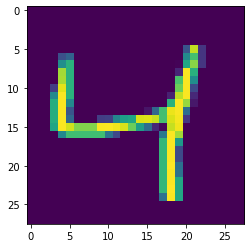

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train.iloc[2,:].values.reshape(28,28))

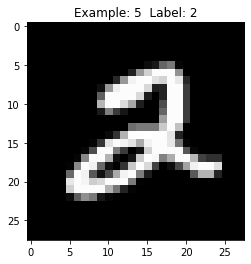

In [13]:
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()
    
    
view_digit(5)

# 3.2 차원 축소 알고리즘

## 3.2.1 선형 투영 vs 매니폴드 학습

차원 축소에는 주요한 두 가지 유형이 있다.

1. 고차원 공간에서 저차원 공간으로 선형적으로 데이터를 투영하는 (선형 투영). 여기에는 주성분 분석(PCA), 특잇값 분해 (SVD), 랜덤 투영 같은 기법이 있다.

2. 비선형 차원 축소라고도 하는 매니폴드 학습. 여기에는 유클리드 거리가 아닌 데이터 포인트들 사이 곡선 거리(지오데식 거리)를 학습하는 아이소맵[ISOmap]같은 기법이 있다. 다른 기법으로는 다차원 스케일링( multidimensional scaling, MDS) , 지역 선형 임베딩(locally linear embedding, LLE), t-분포 확률적 임베딩(t - SNE), 사전 학습 ,랜덤 트리 임베딩, 독립 성분 분석 등이 있다.

## 3.3.2 PCA 실전 예제

In [18]:
from sklearn.decomposition import PCA

n_components =784
whiten =False
random_state =2018

pca =PCA(n_components =n_components , whiten =whiten, random_state =random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA =pd. DataFrame(data =X_train_PCA, index= train_index)

X_train_PCA

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.461486,-1.246855,0.046273,-2.151945,-0.247279,-0.925423,0.889330,0.507176,-1.541691,0.689369,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.769952e-05,0.000000e+00,-0.000000e+00,-0.000000e+00
1,3.921789,-1.251975,2.335259,-1.340886,-3.421518,-0.725724,-0.206345,-0.345285,0.134086,0.595475,...,4.742170e-09,3.580562e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.123725e-07,9.395818e-07,3.014860e-07,-9.617160e-09
2,-0.203721,1.547937,-0.980331,2.039093,-1.079877,0.112884,-3.312348,1.403171,-0.592898,-0.763839,...,-4.074979e-09,1.525597e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.025918e-07,-1.396577e-06,-2.071702e-06,9.332764e-08
3,-3.148450,-2.296099,1.091154,0.484597,0.066825,2.778972,-1.834356,-0.174753,1.166451,0.052855,...,-2.637537e-09,-1.327225e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.694219e-07,2.036669e-06,6.437483e-07,-1.065743e-06
4,-1.442739,2.871986,0.175652,-0.976909,0.302757,0.120654,-0.376723,-1.478132,1.003752,0.540808,...,2.856352e-08,1.209660e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.287487e-07,5.551837e-06,-2.360454e-06,1.661697e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.147555,-1.972690,-3.739122,1.209665,-0.312002,-0.893656,1.491477,0.013916,-0.385557,-2.202909,...,-1.235761e-09,-7.058333e-09,7.806817e-09,-8.796969e-09,3.067120e-10,-9.134856e-10,1.711371e-08,5.020282e-09,3.332030e-10,7.047642e-10
49996,1.416381,-0.252682,-0.809476,-0.523546,-3.905657,0.187955,-0.449568,-1.231870,-0.104625,0.510858,...,3.175924e-08,6.614789e-08,-4.256530e-09,-6.259228e-09,-3.637915e-09,-1.452559e-09,-1.338935e-08,4.821441e-09,-9.016426e-09,2.229096e-09
49997,-1.425329,-1.957541,-2.551116,0.094593,0.654068,-0.603917,0.312860,-0.047757,0.994548,0.222441,...,1.209317e-08,3.002637e-09,4.055785e-09,5.872140e-09,-4.875055e-09,-2.666693e-09,6.463983e-09,2.125245e-09,-3.535153e-10,-2.285242e-09
49998,-1.507546,1.025468,0.107841,0.276075,2.285549,-0.590754,-0.676684,-0.062367,0.050038,1.578244,...,-6.101628e-09,-2.223911e-09,3.903040e-09,-4.990766e-09,-1.209658e-09,-2.191153e-10,3.466794e-09,2.763308e-09,-2.949933e-09,6.518028e-10


In [19]:
# 784개의 주성분으로 추출한 원본 데이터의 분산 비율

print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999839005775


In [20]:
pca.explained_variance_ratio_

array([9.74435136e-02, 7.05982074e-02, 6.21607155e-02, 5.37951142e-02,
       4.85805236e-02, 4.31960858e-02, 3.27757746e-02, 2.88639124e-02,
       2.76883934e-02, 2.36592814e-02, 2.09952015e-02, 2.02041157e-02,
       1.71579160e-02, 1.68179870e-02, 1.57926660e-02, 1.49275577e-02,
       1.31816594e-02, 1.27655370e-02, 1.18651530e-02, 1.15101766e-02,
       1.06910896e-02, 1.00750150e-02, 9.53631662e-03, 9.07864049e-03,
       8.82789586e-03, 8.36952589e-03, 8.17540661e-03, 7.84796663e-03,
       7.42015429e-03, 6.90708868e-03, 6.58566132e-03, 6.43654820e-03,
       6.02718350e-03, 5.85304666e-03, 5.69431437e-03, 5.41853346e-03,
       5.07309940e-03, 4.88394080e-03, 4.82056336e-03, 4.73351870e-03,
       4.55973251e-03, 4.41411324e-03, 4.16429574e-03, 3.96221736e-03,
       3.85332457e-03, 3.74064222e-03, 3.61330900e-03, 3.50470562e-03,
       3.40270274e-03, 3.21048149e-03, 3.18202493e-03, 3.10987374e-03,
       2.94572581e-03, 2.88293115e-03, 2.85742804e-03, 2.70759338e-03,
      

In [21]:
# X개의 주성분으로 추출한 원본 데이터의 분산 비율

importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.4887615]
Variance Captured by First 20 Principal Components:  [0.6439795]
Variance Captured by First 50 Principal Components:  [0.8248605]
Variance Captured by First 100 Principal Components:  [0.91465837]
Variance Captured by First 200 Principal Components:  [0.9665007]
Variance Captured by First 300 Principal Components:  [0.9862489]


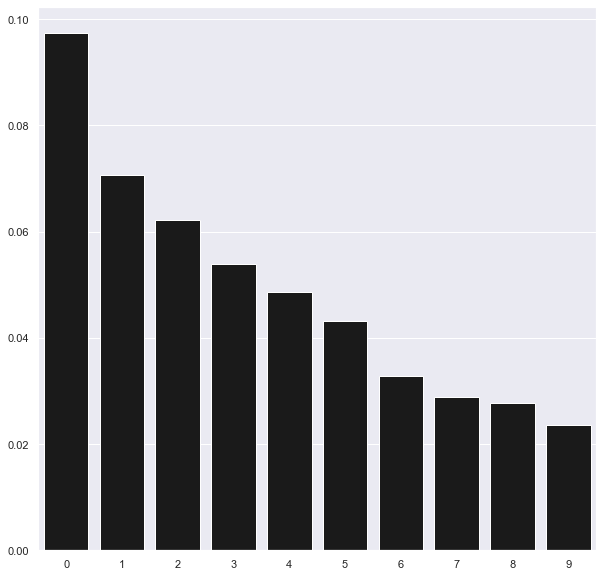

In [25]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k')

### PCA로 데이터 분리해서 시각화하기

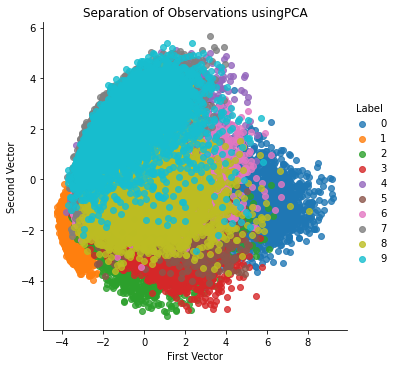

In [24]:
import seaborn as sns

def scatterPlot(xDF, yDF ,algoName):
    tempDF =pd.DataFrame(data= xDF.loc[:,0:1],index= xDF.index)
    tempDF = pd.concat((tempDF, yDF) , axis = 1, join='inner')
    tempDF.columns = ['First Vector','Second Vector' ,"Label"]
    sns.lmplot(x ='First Vector', y='Second Vector' , hue = 'Label' , data =tempDF ,fit_reg =False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using" + algoName)
    
    
scatterPlot(X_train_PCA , y_train, "PCA")

원본 데이터셋은 구분하기 힘듬

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

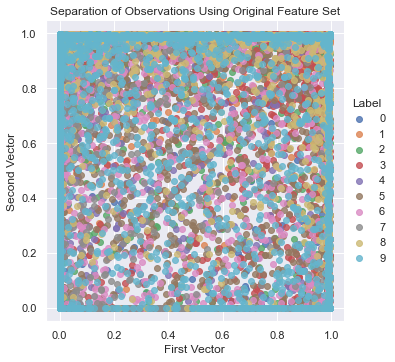

In [26]:
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

### 3.3.3 점진적 PCA

데이터셋의 크기가 매우 커서 메모리에 저장할 수 없는 경우, 메모리에 저장되는 키기로 배치를 작게 설정해 점진적으로 PCA를 수행할 수 잇다 .배치 크기는 수동으로 설정하거나 자동으로 결정할 수 있다. 배치 기반 PCA 유형으로는 점진적 PCA가 있다. 일반 PCA와 점진적 PCA의 주성분 결과는 일반적으로 매우 유사하다.



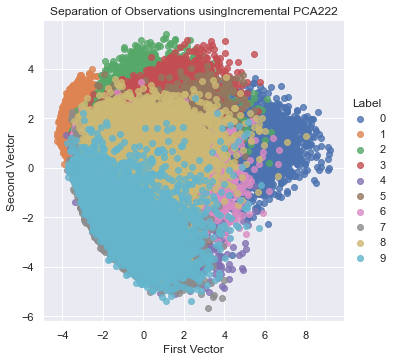

In [31]:
# 점진적 PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = \
    pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA222")

### 3.3.4 희소 PCA

일반 PCA 알고리즘은 모든 입력 변수에서 선형 결합을 탐색해 원본 피처 공간을 최대한 조밀하게 줄인다. 그러나 일부 머신러닝 문제의 경우 어느 정도의 희소성(SPARSITY)이 선호될 수 있다. 알파(alpha)라는 하이퍼파라미터로 제어함으로써 희소성을 어느 정도 유지하는 PCA 버전을 희소 PCA라고 한다. 희소 PCA 알고리즘은 일부 입력 변수에서만 선형 결합을 탐색해 원본 피처 공간을 어느 정도 줄이지만 일반 PCA만큼 조밀하게 만들지는 않는다.

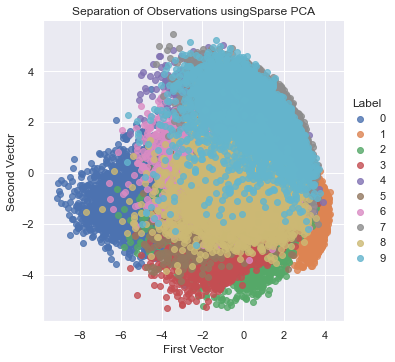

In [33]:
# 희소 PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

# 수정 사항 : normalize_components='deprecated' 옵션을 설정하면 경고메세지가 삭제됨 components 정규화는 무조건 실행 되기 때문에 의미 없는 옵션임
sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs,
                      #normalize_components='deprecated'
                     )

sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
    pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

예상대로 이 산점도는 일반 PCA의 산점도와 다르게 보인다. 일반 PCA와 희소 PCA는 주성분을 서로 다르게 생성하며 관측치의 분리도 조금 다르다.

### 3.3.5 커널PCA

일반 PCA, 점진적 PCA,  희소 PCA는 원본 데이터를 저차원 공간에 선형으로 투영하지만, 비선형 PCA 유형 중 하나인 커널 PCA는 원본 데이터 포인트 쌍들에 대해 유사성 함수를 실행시켜 비선형적으로 차원을 축소한다. 커널 PCA는 이 유사성 함수를 학슴함으로써 데이터 포인트 대부분이 있는 암시적 피처 공간을 매핑하고 이 공간을 원본 피처셋보다 훨씬 더 적은 수의 차원으로 만든다. 이 방법은 원본 피처셋을 선형으로 분리할 수 없는 경우에 특히 효과적이다.

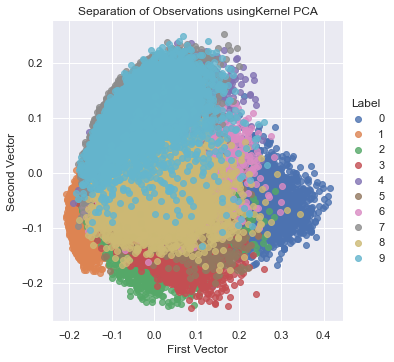

In [35]:
# 커널 PCA
from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                      gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = \
    pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

MNIST 데이터셋에 적용한 커널 PCA의 2차원 산점도는 이전 선형 PCA중 하나와 결과가 거의 동일. RBF커널을 사용해도 차원 축소 결과는 개선되지 않음.

# 3.4 SVD

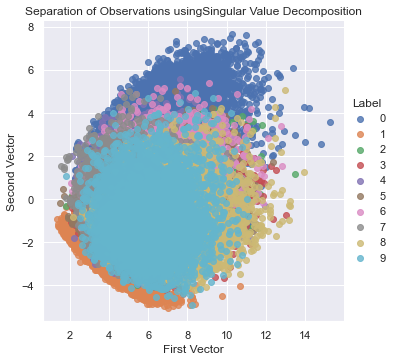

In [36]:
# 특잇값 분해
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

# 3.5 랜덤 투영

또 다른 선형 차원 축소 기법은 존슨-린덴슈트라우스 보조정리 기반의 랜덤 투영이 있다. 존슨 -린덴슈트라우스 보조정리 에 따르면, 고차원 공간의 데이터 포인트들은 포인트 사이의 거리가 거의 보존되는 방식으로 훨씬 더 낮은 차원의 공간에 삽입될 수 있다. 즉 ,고차원 공간에서 저차원 공간으로 이동하는 경우에도 원본 피처셋의 핵심 정보가 유지된다.


## 3.5.1 GRP

랜덤 투영에는 두 가지 버전이 있다 .일반 버전인 가우시안 랜덤투영(Gaussaian random Projection, GRP)와 희소 버전인 희소 랜덤 투영(Sparse random projection , SRP)이다.

가우시안 랜덤 투영의 경우 축소된 피처 공간에 갖고 싶은 주성분의 수를 설정하거나 하이퍼파라미터인 입실론을 설정할 수 있다. eps는 존슨-린덴슈트라우스 보조정리에 따라 임베딩의 품질을 제어하며 이 값이 작을수록 차원의 수가 높아진다. 이 하이퍼파라미터를 다음과 같이 설정한다.

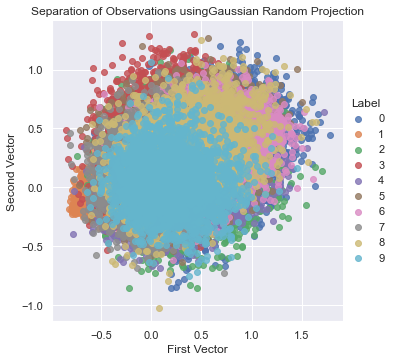

In [37]:
# 가우시안 랜덤 투영
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

랜덤 투영은 PCA와 같은 선형 투영의 한 유형이지만, 완전히 다른 계열의 차원 축소 기법이다. 따라서 랜덤 투영 산점도는 일반 PCA, 점진적 PCA, 희소 PCA, 커널 PCA의 산점도와 매우 다르게 보인다.

## 3.5.2 SRP
PCA 희소 버전이 있는 것처럼 랜덤 투영에도 희소 버전이 있다. 바로 희소 랜덤 투영(Sparse random Projection, SRP)이다. 희소 랜덤 투영은 변환된 피처셋에서 어느 정도의 희소성을 유지하며 일반적으로 가우시안 랜덤 투영(GRP)보다 훨씬 빠르게 원본 데이터를 축소된 공간으로 변환시킴으로 훨씬 효율적.

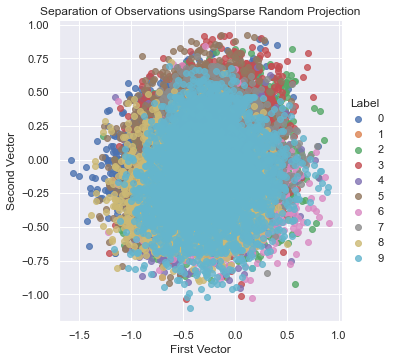

In [38]:
# 희소 랜덤 투영
from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
        random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

# 3.6 Isomap

고차원 공간에서 저차원 공간으로 데이터를 선형으로 투영하는 대신 비선형 차원 축소 방법을 사용할 수 있다 .이러한 방법을 통상적으로 매니폴드 학습이라고 한다.

매니폴드 학습의 기본 유형은 아이소메트릭 매핑(isometric mapping) 줄여서 아이소맵(isomap)이다. 커널 PCA와 마찬가지로 isomap은 유클리드 거리가 아닌 곡선 거리 또는 지오데식 거리로 모든 데이터 포인트 간의 쌍별 거리를 계산해 원본 피처셋의 새로운 저차우너 임베딩을 학습한다. 즉, Isommap은 매니폴드 공간에서 각 포인트들과 이웃하는 포인트들 간의 상대적인 위치를 기반으로 원본 데이터의 고유한 기하학 구조를 학습한다.



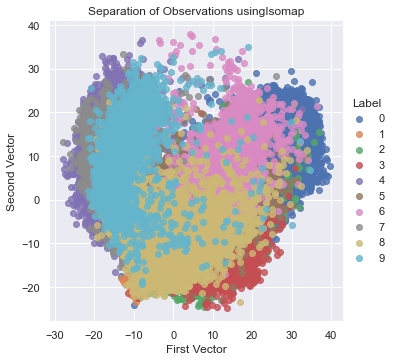

In [39]:
# Isomap

from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors, \
                n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, \
                                   index=validation_index)

scatterPlot(X_train_isomap, y_train, "Isomap")

# 3.7 MDS

다차원 스케일링(MDS, Multidimensional scaling)은 비선형 차원 축소의 한 유형으로, 원본 데이터셋에서 데이터 포인트들의 유사성을 학습하고 ,이 유사성 학습 결과를 사용해 더 낮은 차원 공간에서 이것을 모델링한다.

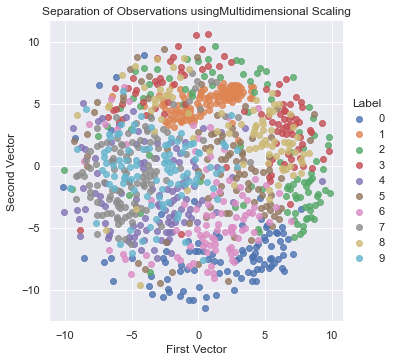

In [40]:
# 다차원 스케일링
from sklearn.manifold import MDS

n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, \
          metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

In [43]:
X_train_mds

,0,1
0,5.325204,-0.352233
1,3.394096,-7.016880
2,-7.720181,0.608485
3,2.520855,5.971553
4,-4.661012,0.477704
...,...,...
996,1.139585,-2.380694
997,5.939576,-5.428928
998,0.282741,7.827217
999,4.228006,-1.035711


# 3.8 LLE

널리 사용하는 또 다른 비선형 축소 방법으로는 지역 선형 임베딩(locally linear embedding, LLE)가 있다. 이 방법은 원본 피처 공간에서 축소된 공간으로 데이터를 투영할 때 지역 내 이웃과의 거리를 유지한다. LLE는 데이터를 더 작은 성분(즉, 포인트들의 이웃)으로 분할하고 성분을 선형 임베딩으로 모델링해 원본 고차원 데이터에서 비선형 구조를 발견한다.

이 알고리즘에서는 우리가 원하는 성분의 수와 주어진 이웃에서 고려해야 할 포인트 수를 설정한다.

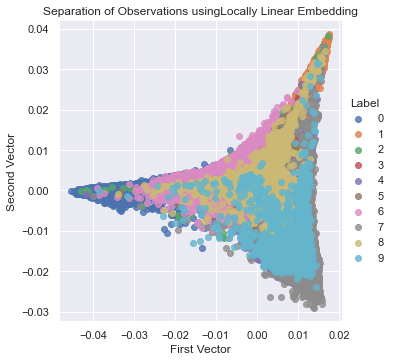

In [41]:
# 지역 선형 임베딩
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
        n_components=n_components, method=method, \
        random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])             ### ?? 왜 5000개만 fit?
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

In [42]:
X_train_lle

,0,1
0,-0.002115,0.002297
1,-0.038639,0.000457
2,0.004910,-0.019988
3,0.016444,0.032778
4,0.010456,-0.014569
...,...,...
49995,-0.007056,0.001748
49996,-0.035979,-0.000526
49997,0.000044,0.003190
49998,0.007963,-0.011929


In [44]:
X_validation_lle

,0,1
50000,-0.000520,0.004457
50001,0.001202,0.001066
50002,-0.011566,0.004327
50003,0.008092,-0.016014
50004,-0.011080,0.002619
...,...,...
59995,0.001581,0.004341
59996,-0.002263,0.003481
59997,-0.002550,0.000614
59998,-0.009111,0.006458


# 3.9 t-SNE

t- 분포 확률적 임베딩 (t-SNE, t-distributed stochastic neighbor embedding)은 고차원 데이터를 시각화하기 위한 비선형 차원 축소 기법이다. t-SNE는 각 고차원 데이터 포인트를 2차원 또는 3차원 공간으로 모델링해 이를 수행한다. 유사한 포인트들은 서로 가깝게 모델링되고 유사하지 않은 포인트들은 더 멀리 모델링한다. 이는 포인트 쌍들을 이용해 고차원 확률 분포와 저차원 확률 분포를 각각 만듦으로써 수행되는데, 유사한 포인트들은 높은 확률값을 가지고 유사하지 않은 포인트들은 낮은 확률값을 가지게 된다. 특히 t-SNE는 두 확률 분포 간 쿨백-라이블러 발산(Kullback -Leibler divergence, KLD)을 최소화한다.

t- SNE를 실제로 적용할 때는 PCA와 같은 다른 차원 축소 기술을 사용해 차원의 수를 줄인 다음에 사용하는 것이 가장 좋다. 다른 유형의 차원 축소를 먼저 적용함으로써 t-SNE에 공급되는 피처의 노이즈를 줄이고 알고리즘의 계산 속도를 높인다.




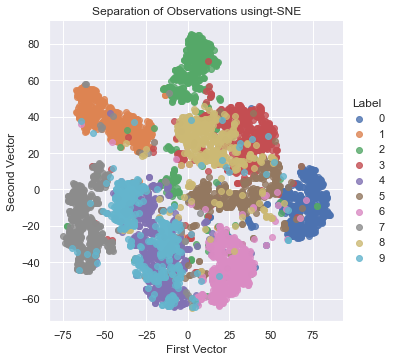

In [45]:
# t-분포 확률적 임베딩
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])   # PCA 부터 먼저 때린다.
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

t-SNE는 비 볼록 비용 함수를 가지고 있다. 즉 알고리즘 초기화가 달라지면 결과도 달라진다. 이에 대한 안정적인 해결책은 아직 없다.

# 3.10 사전학습( dictionary Learning)

C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)


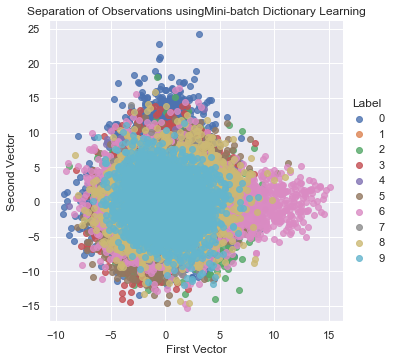

In [46]:
# 미니-배치 사전 학습
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
                        n_components=n_components, alpha=alpha, \
                        batch_size=batch_size, n_iter=n_iter, \
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
    data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = \
    miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = \
    pd.DataFrame(data=X_validation_miniBatchDictLearning, \
    index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

# 3.11 ICA


레이블이 없는 데이터의 공통 문제중 하나는 주어진 피처에 수많은 독립 신호가 함께 포함됐다. 독립 성분 분석(independent component analysis,ICA)를 사용해 이러한 혼합 신호를 개별 성분으로 분리할 수 있다. 분리가 완료되면 생성된 개별 성분들을 여러 방식으로 조합해 원본 피처를 재구성할 수 있다. ICA는 일반적으로 신호 처리 작업(ex, 바쁜 커피 하우스의 오디오 클립에서 개별 음성을 식별하기 위해)에 사용.


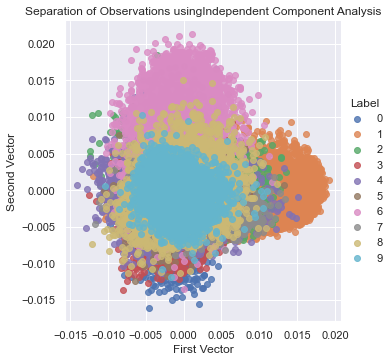

In [47]:
# 독립 성분 분석
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

fastICA = FastICA(n_components=n_components, algorithm=algorithm, \
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, \
                                    index=validation_index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")